In [101]:
# Load Python Libraries
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
# Create CAS Connection
conn = swat.CAS(host, portnum, protocol='http')

In [103]:
# Load CAS Action Sets
conn.loadactionset('pca')
conn.loadactionset('tsne');

NOTE: Added action set 'pca'.
NOTE: Added action set 'tsne'.


In [104]:
# Read in Data
hp_train = pd.read_csv('/Users/anviol/Desktop/Content/Datasets/Ames Housing Data/hp_train.csv')
hp_train.shape

(1460, 81)

In [105]:
# Subset Data
hp_train_sub = hp_train.loc[:,('LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
                    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF',
                    'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                    'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PavedDrive','WoodDeckSF','OpenPorchSF',
                    'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MoSold','YrSold','SalePrice','Street',
                    'Alley','LotShape','LandContour','Utilities','LotConfig','HouseStyle','Electrical','GarageFinish')]
hp_train_sub.shape

(1460, 44)

In [106]:
# Find Missing Values
hp_na_vals = hp_train_sub.isnull().sum()/len(hp_train_sub)*100
hp_na_vals = hp_na_vals.to_frame()
hp_na_vals.columns = ['% Missing']

hp_na_vals.loc[hp_na_vals['% Missing'] > 0]

,% Missing
LotFrontage,17.739726
MasVnrArea,0.547945
Alley,93.767123
Electrical,0.068493
GarageFinish,5.547945


In [107]:
# Dataframe for Time Series Plot
hp_plot_df = hp_train.filter(['MoSold','YrSold','SalePrice'], axis=1)
hp_plot_df["MoYrSold"] = hp_plot_df["MoSold"].map(str) + '-' + hp_plot_df["YrSold"].map(str);

hp_plot_df.sort_values(['YrSold', 'MoSold'], ascending=[True, True], inplace=True)

In [108]:
# Create Features (Dummy Variables)
hp_train_sub_bins = pd.get_dummies(hp_train_sub)

hp_train_sub_bins['LotFrontageNullBin'] = np.where(hp_train_sub_bins['LotFrontage'].isnull(), 1, 0)
hp_train_sub_bins['LotFrontage'].fillna(0, inplace=True)

hp_train_sub_bins['MasVnrAreaNullBin'] = np.where(hp_train_sub_bins['MasVnrArea'].isnull(), 1, 0)
hp_train_sub_bins['MasVnrArea'].fillna(0, inplace=True)

hp_train_sub_bins.shape

(1460, 75)

In [109]:
# Preview Data
pd.set_option('display.max_columns', None) # Show All Columns in Preview
hp_train_sub_bins.head(n=5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,LotFrontageNullBin,MasVnrAreaNullBin
0,65.0,8450,7,5,2003,2003,196.0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,2,2008,208500,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,5,2007,181500,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,9,2008,223500,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,2,2006,140000,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,84.0,14260,8,5,2000,2000,350.0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,12,2008,250000,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [110]:
hp_train_sub_bins.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,LotFrontageNullBin,MasVnrAreaNullBin
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890,0.065068,0.934932,0.061644,0.020548,0.917808,0.004110,0.995890,0.034247,0.028082,0.331507,0.028082,0.006849,0.633562,0.043151,0.034247,0.024658,0.897945,0.999315,0.000685,0.180137,0.064384,0.032192,0.002740,0.720548,0.105479,0.009589,0.497260,0.005479,0.007534,0.304795,0.025342,0.044521,0.064384,0.018493,0.002055,0.000685,0.913699,0.241096,0.289041,0.414384,0.177397,0.005479
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883,0.246731,0.246731,0.240590,0.141914,0.274751,0.063996,0.063996,0.181924,0.165264,0.470916,0.165264,0.082505,0.481996,0.203266,0.181924,0.155132,0.302824,0.026171,0.026171,0.384433,0.245519,0.176570,0.052289,0.448884,0.307275,0.097486,0.500164,0.073846,0.086502,0.460478,0.157217,0.206319,0.245519,0.134772,0.045299,0.026171,0.280905,0.427895,0.453472,0.492784,0.382135,0.073846
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [111]:
# Create Final Dataframe for Modeling
hp_train_sub_bins['PriceGrp'] = pd.qcut(hp_train_sub_bins['SalePrice'], 10, labels=False)

hp_train_sub_bins['ID'] = hp_train_sub_bins.index
hp_train_fin = hp_train_sub_bins.drop(['SalePrice'], axis=1)

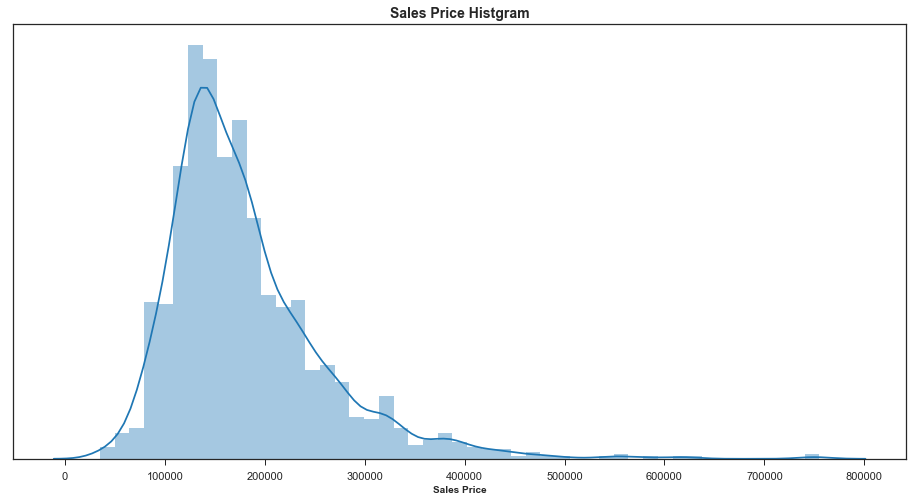

In [112]:
# Show Home Sale Price Distribution
import matplotlib.ticker as mtick

plt.figure(figsize=(16,8))
sales_dist = sns.distplot(hp_train_sub.SalePrice)

sales_dist.axes.set_title('Sales Price Histgram', fontsize=14, fontweight='bold')
sales_dist.set_xlabel("Sales Price", fontsize=10, fontweight='bold');
sales_dist.set(yticklabels=[], yticks=[]);

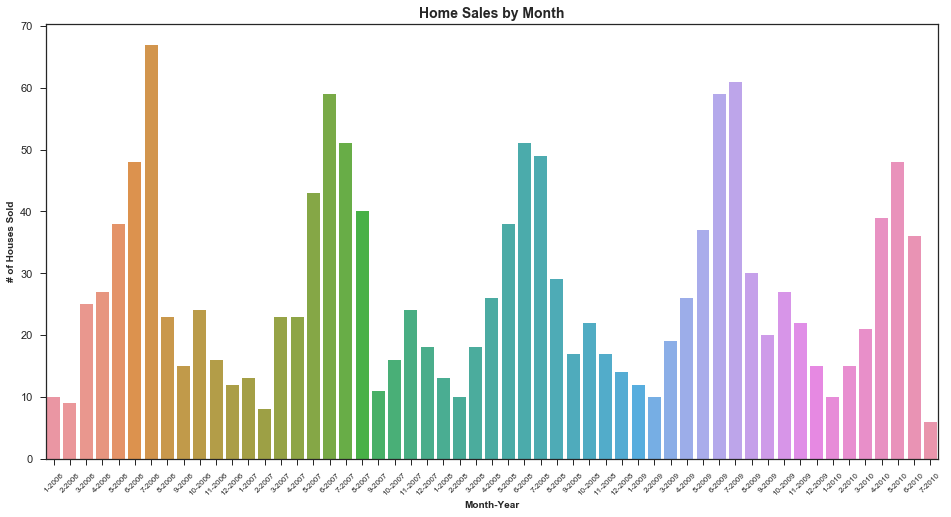

In [113]:
# Home Sales Time Series Seasonality
plt.figure(figsize=(16,8))

mo_yr_ts = sns.countplot('MoYrSold', data=hp_plot_df)
mo_yr_ts.axes.set_title('Home Sales by Month', fontsize=14, fontweight='bold')
mo_yr_ts.set_xlabel("Month-Year", fontsize=10, fontweight='bold')
mo_yr_ts.set_ylabel("# of Houses Sold", fontsize=10, fontweight='bold')

mo_yr_ts.set_xticklabels(mo_yr_ts.get_xticklabels(), rotation=45, fontsize=8);

In [119]:
# Upload to CAS Full and Sample Dataframe
hp_train_cas = conn.upload_frame(hp_train_fin, casout=dict(name='hp_train_fin', replace=True));

NOTE: Cloud Analytic Services made the uploaded file available as table HP_TRAIN_FIN in caslib CASUSER(anviol).
NOTE: The table HP_TRAIN_FIN has been created in caslib CASUSER(anviol) from binary data uploaded to Cloud Analytic Services.


In [131]:
# PCA - 'Extracts principal components by using the eigenvalue decomposition method'
r=conn.eig(table='hp_train_fin',
              n=40,
              inputs = list(hp_train_fin.drop(['ID', 'PriceGrp'], axis=1)),
              output= {'casout':{'name':'pca_out', 'replace':'TRUE'},
                       'copyVars':['ID','PriceGrp']})

In [132]:
r.Eigenvalues[0:5]

,Number,Eigenvalue,Difference,Proportion,Cumulative
0,1,8.337523,3.744271,0.112669,0.112669
1,2,4.593252,1.339296,0.062071,0.174740
2,3,3.253956,0.240254,0.043972,0.218713
3,4,3.013701,0.712769,0.040726,0.259438
4,5,2.300932,0.085765,0.031094,0.290532


In [133]:
# Scored Dataframe
pca_out = conn.fetch(table='pca_out', maxrows=2000, to=2000)
pca_out = pd.DataFrame(pca_out['Fetch'])

pca_out.head(n=5)

,ID,PriceGrp,Score1,Score2,Score3,Score4,Score5,Score6,Score7,Score8,Score9,Score10,Score11,Score12,Score13,Score14,Score15,Score16,Score17,Score18,Score19,Score20,Score21,Score22,Score23,Score24,Score25,Score26,Score27,Score28,Score29,Score30,Score31,Score32,Score33,Score34,Score35,Score36,Score37,Score38,Score39,Score40
0,0.0,7.0,-1.697571,-1.050776,-2.306901,-1.516282,0.591410,0.994337,1.363603,0.292688,-0.508922,-0.185127,-0.559903,-0.636488,0.182987,-0.914474,1.120578,0.336101,-0.898511,-0.381938,-0.611958,0.526139,-0.255666,0.216920,-0.284513,0.283273,-0.219008,-0.067926,0.461651,-0.426532,-0.258139,0.164956,0.092214,0.248115,0.002643,-0.277528,-0.084826,0.072154,0.729913,0.159893,-0.064988,-0.106372
1,1.0,6.0,-0.261971,1.724116,-0.294494,-0.181154,-0.220464,-1.320553,-0.270891,-0.988647,0.783319,-1.288284,0.985238,-0.382036,-2.518443,-0.111689,1.033941,-0.634433,2.069468,-1.347872,0.646410,0.840837,-0.985821,-3.151439,-1.543790,0.246876,-0.392776,-0.793055,1.163131,-0.110006,-0.196389,-0.528155,-0.408553,-0.187871,-0.753197,-1.332539,-1.374785,-2.707714,1.737600,-0.132395,0.699733,0.590281
2,2.0,7.0,-2.433683,-0.653035,-1.855482,-0.021604,0.084324,1.303149,0.532911,0.659807,0.040373,0.490606,-0.221795,0.145257,0.922332,-1.866885,0.339276,-0.012930,0.186843,0.207891,0.119960,-0.007106,-0.377328,0.807447,-0.068847,0.288367,0.119334,-0.220046,-0.128189,-0.261629,0.133127,-0.214128,-0.054923,0.382422,0.248869,-0.742487,0.240506,-0.129188,-0.468710,0.140328,-0.002386,0.099903
3,3.0,3.0,-0.012279,-1.519301,-0.491391,1.548317,-0.436098,-0.770677,-1.044211,-2.528895,-0.397678,-0.285604,1.673384,-0.901416,1.724054,-1.137547,-0.988518,1.035982,-1.146017,0.320558,-0.142751,0.128018,0.961089,0.739182,0.482301,-0.535457,-1.479113,-0.553676,0.155910,0.121545,-0.227850,0.619833,-0.050676,-0.132500,0.579214,-2.475040,0.623549,1.311425,1.119721,1.426785,-0.144075,0.075241
4,4.0,8.0,-4.862597,-1.744805,-1.200159,0.571064,-0.494431,0.930820,0.030966,-1.184174,0.144527,0.039845,0.545247,-0.510881,-0.588836,-1.005275,0.645652,-0.499679,0.339805,-0.951165,1.642541,0.475417,-0.977688,-1.198640,-1.922176,1.367997,0.067675,-2.315765,0.664962,-0.823445,0.253470,-1.875567,-0.706214,0.845549,1.015436,-1.877989,0.317427,-1.983696,-0.514388,0.509704,0.527238,0.096949


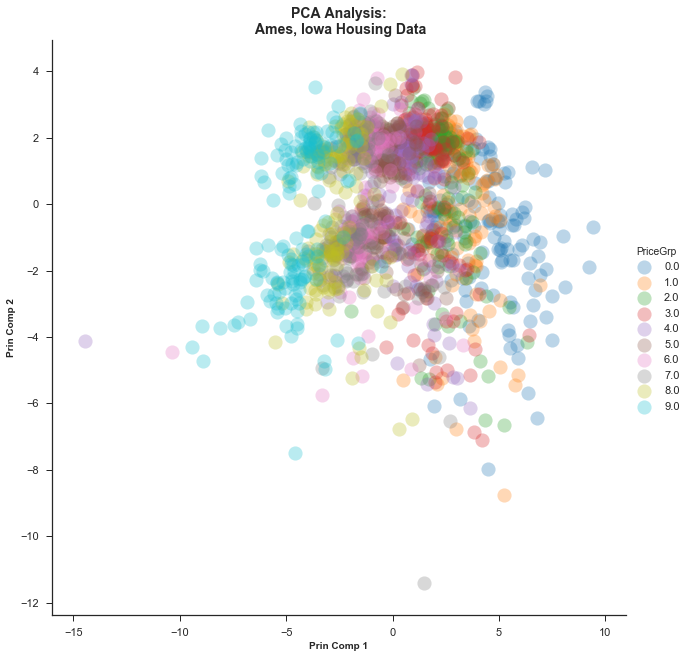

In [134]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=pca_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='PriceGrp',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Analysis:\n Ames, Iowa Housing Data', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [141]:
# t-SNE
r2 = conn.tSne(table='hp_train_fin',
               nDimensions = 2,
               inputs = list(hp_train_fin.drop(['ID', 'PriceGrp'], axis=1)),
               maxIters = 1000,
               perplexity = 100,
               learningRate = 1000,
               output= {'casout':{'name':'tsne_out', 'replace':'TRUE'},
                        'copyVars':['ID','PriceGrp']})

NOTE:  Using SEED=1848153410.
NOTE:  Data reading complete.
NOTE:  >>> Progress: completed iteration 100  ::: Loss = 30.279246229
NOTE:  >>> Progress: completed iteration 200  ::: Loss = 30.279246229
NOTE:  >>> Progress: completed iteration 300  ::: Loss = 0.0347317712
NOTE:  >>> Progress: completed iteration 400  ::: Loss = 0.0324972075
NOTE:  >>> Progress: completed iteration 500  ::: Loss = 0.0324972051
NOTE:  >>> Progress: completed iteration 600  ::: Loss = 0.0324972051
NOTE:  >>> Progress: completed iteration 700  ::: Loss = 0.0324972051
NOTE:  >>> Progress: completed iteration 800  ::: Loss = 0.0324972051
NOTE:  >>> Progress: completed iteration 900  ::: Loss = 0.0324972051
NOTE:  >>> Progress: completed iteration 1000  ::: Loss = 0.0324972051
NOTE:  Model output table complete.


In [142]:
# Scored Dataframe
tsne_out = conn.fetch(table='tsne_out', maxrows=2000, to=2000)
tsne_out = pd.DataFrame(tsne_out['Fetch'])

tsne_out.head(n=5)

,ID,PriceGrp,_DIM_1_,_DIM_2_
0,0.0,7.0,0.414241,-0.244603
1,1.0,6.0,0.044657,-0.464495
2,2.0,7.0,-0.399775,-0.284433
3,3.0,3.0,0.068759,-0.453941
4,4.0,8.0,-0.511411,0.226039


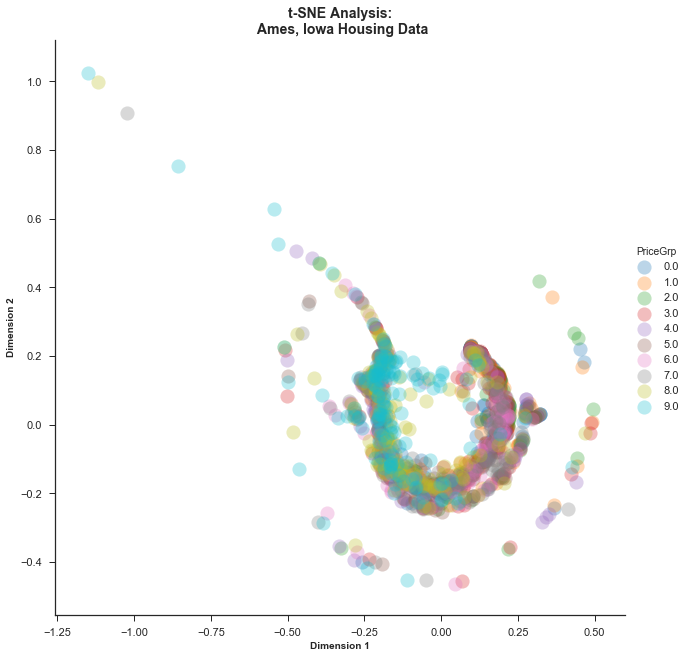

In [143]:
# Plot t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=tsne_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='PriceGrp',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Analysis:\n Ames, Iowa Housing Data', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')